<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Human-Activities-Recognition-Using-Smartphones" data-toc-modified-id="Human-Activities-Recognition-Using-Smartphones-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Human Activities Recognition Using Smartphones</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocessing the data</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Standarizing-the-data" data-toc-modified-id="Standarizing-the-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Standarizing the data</a></span></li></ul></li></ul></li><li><span><a href="#Analysis/Modeling" data-toc-modified-id="Analysis/Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis/Modeling</a></span><ul class="toc-item"><li><span><a href="#Human-Activity-Data-Dendrogram" data-toc-modified-id="Human-Activity-Data-Dendrogram-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Human Activity Data Dendrogram</a></span></li><li><span><a href="#Agglomerative-Clustering" data-toc-modified-id="Agglomerative-Clustering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Agglomerative Clustering</a></span></li><li><span><a href="#Gaussian-Mixture-Clustering" data-toc-modified-id="Gaussian-Mixture-Clustering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gaussian Mixture Clustering</a></span></li></ul></li><li><span><a href="#K-means" data-toc-modified-id="K-means-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-means</a></span></li><li><span><a href="#Restaurant-&amp;-Consumer-Data-Set" data-toc-modified-id="Restaurant-&amp;-Consumer-Data-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Restaurant &amp; Consumer Data Set</a></span><ul class="toc-item"><li><span><a href="#Data-Exploratory-Analysis" data-toc-modified-id="Data-Exploratory-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Exploratory Analysis</a></span></li><li><span><a href="#Analysis/Modeling" data-toc-modified-id="Analysis/Modeling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Analysis/Modeling</a></span><ul class="toc-item"><li><span><a href="#Benchmark-Model" data-toc-modified-id="Benchmark-Model-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Benchmark Model</a></span></li><li><span><a href="#Content-based-Model" data-toc-modified-id="Content-based-Model-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Content-based Model</a></span></li><li><span><a href="#Second-Content-Based-Model" data-toc-modified-id="Second-Content-Based-Model-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Second Content-Based Model</a></span></li><li><span><a href="#SVD" data-toc-modified-id="SVD-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>SVD</a></span></li></ul></li></ul></li></ul></div>

# Introduction
Asignacion 3 ESMA4016

### Imports
Import libraries and write settings here.

In [152]:
# Data manipulation
import pandas as pd
import numpy as np
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2
# Visualizations
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import mixture
from sklearn.cluster import KMeans, DBSCAN
import random
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from surprise import SVD 
from surprise.dataset import Reader, Dataset
from itertools import cycle, islice
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Human Activities Recognition Using Smartphones

In [81]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


# Combine boths dataframes
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'

data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

data['subject'] = '#' + data['subject'].astype(str)

# Create label
label = data.pop('Activity')

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))

train_df.head()

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  \
0         -0.923527         -0.934724         -0.567378         -0.744413   
1         -0.957686         -0.943068         -0.557851         -0.818409   
2         -0.977469         -0.938692         -0.557851         -0.818409   
3         -0.989302         -0.938692         -0.576159         -0.829711   
4         -0.990441         -0.942469         -0.569174         -0.824705   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  \
0          0.852947          0.685845          0.814263       -0.965523   
1          0.849308          0.685845          0.822637       -0.981930   
2          0.843609          0.682401          0.839344       -0.983478   
3          0.843609          0.682401          0.837869       -0.986093   
4          0.849095          0.683250          0.837869       -0.992653   

   tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  \
0            -0.999945            -0.999863            -0.994612   
1            -0.999991            -0.999788            -0.998405   
2            -0.999969            -0.999660            -0.999470   
3            -0.999976            -0.999736            -0.999504   
4            -0.999991            -0.999856            -0.999757   

   tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  \
0         -0.994231         -0.987614         -0.943220             -0.407747   
1         -0.999150         -0.977866         -0.948225             -0.714892   
2         -0.997130         -0.964810         -0.974675             -0.592235   
3         -0.997180         -0.983799         -0.986007             -0.627446   
4         -0.998004         -0.981232         -0.991325             -0.786553   

   tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  \
0             -0.679338             -0.602122                0.929294   
1             -0.500930             -0.570979                0.611627   
2             -0.485821             -0.570979                0.273025   
3             -0.850930             -0.911872                0.061436   
4             -0.559477             -0.761434                0.313276   

   tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  \
0               -0.853011                0.359910               -0.058526   
1               -0.329549                0.284213                0.284595   
2               -0.086309                0.337202               -0.164739   
3                0.074840                0.198204               -0.264307   
4               -0.131208                0.191161                0.086904   

   tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  \
0                0.256892               -0.224848                0.264106   
1                0.115705               -0.090963                0.294310   
2                0.017150               -0.074507                0.342256   
3                0.072545              

## Preprocessing the data

In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#le.fit(["WALKING", "LAYING", "STANDING", "SITTING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS"])
train_df.drop("Data", axis=1, inplace=True)

train_df['Activity'] = le.fit_transform(train_df['Activity'])
df_en = train_df.drop(columns=['subject']) #dropping unwaned columns
df_en_data = df_en.drop(columns = ['Activity'])
df_en_target = df_en['Activity']
df_en_target.value_counts()

df_en_target.head()


0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: Activity, dtype: int64

0    2
1    2
2    2
3    2
4    2
Name: Activity, dtype: int32

## Feature Selection

In [72]:


from skrebate import ReliefF
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

train_df = train_df.astype(float)

fs = ReliefF(n_neighbors=3)
fs.fit(train_df.drop('Activity', axis=1).values, train_df['Activity'].values)
for feature_name, feature_score in zip(train_df.columns,fs.feature_importances_):
    print (feature_name, feature_score)

ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=1, n_neighbors=3,
        verbose=False)

tBodyAcc-mean()-X 0.029798632298687
tBodyAcc-mean()-Y 0.018160639342375273
tBodyAcc-mean()-Z 0.02861120781845926
tBodyAcc-std()-X 0.16403393653085807
tBodyAcc-std()-Y 0.16060996746966044
tBodyAcc-std()-Z 0.1383520256839278
tBodyAcc-mad()-X 0.1522647771267415
tBodyAcc-mad()-Y 0.15311735898834095
tBodyAcc-mad()-Z 0.14280216515406904
tBodyAcc-max()-X 0.20767380413675685
tBodyAcc-max()-Y 0.07954664211146974
tBodyAcc-max()-Z 0.09661310604875195
tBodyAcc-min()-X 0.11871440248084017
tBodyAcc-min()-Y 0.10822800617352618
tBodyAcc-min()-Z 0.0799230972410954
tBodyAcc-sma() 0.14989790912064624
tBodyAcc-energy()-X 0.07040988980051903
tBodyAcc-energy()-Y 0.03667538469673286
tBodyAcc-energy()-Z 0.07193627826106853
tBodyAcc-iqr()-X 0.12412113855286376
tBodyAcc-iqr()-Y 0.11299874045612651
tBodyAcc-iqr()-Z 0.14548469695207106
tBodyAcc-entropy()-X 0.17623207939743477
tBodyAcc-entropy()-Y 0.14773103970174192
tBodyAcc-entropy()-Z 0.11369092181227522
tBodyAcc-arCoeff()-X,1 0.09257730171997625
tBodyAcc-arCoe

In [83]:
for feature_name, feature_score in zip(train_df.columns,fs.feature_importances_):
    if(feature_score < 0.08):
        df_en_data.drop(feature_name, inplace=True, axis=1)
        

In [84]:
df_en_data.shape

(7352, 217)

### Standarizing the data

In [85]:
scaler = StandardScaler()
data = scaler.fit_transform(df_en_data)

<Figure size 576x288 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 0, 'PCA feature')

Text(0, 0.5, 'Variance')

([<matplotlib.axis.XTick at 0x23e03895dd8>,
 <a list of 15 Text xticklabel objects>)

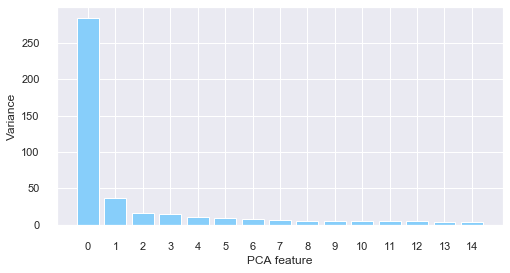

In [35]:
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
pca = PCA(random_state=123)
data_reduced = pca.fit_transform(data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()


# Analysis/Modeling


In [108]:
dist2=pairwise_distances(data)
dist2

array([[0.00000000e+00, 5.50808033e+00, 5.66190088e+00, ...,
        1.36052170e+01, 1.36677362e+01, 1.32882095e+01],
       [5.50808033e+00, 0.00000000e+00, 3.34480431e+00, ...,
        1.31744045e+01, 1.30658567e+01, 1.25909012e+01],
       [5.66190088e+00, 3.34480431e+00, 0.00000000e+00, ...,
        1.31261209e+01, 1.29918341e+01, 1.24821880e+01],
       ...,
       [1.36052170e+01, 1.31744045e+01, 1.31261209e+01, ...,
        0.00000000e+00, 2.84331788e+00, 4.31147875e+00],
       [1.36677362e+01, 1.30658567e+01, 1.29918341e+01, ...,
        2.84331788e+00, 6.74349576e-07, 3.72084343e+00],
       [1.32882095e+01, 1.25909012e+01, 1.24821880e+01, ...,
        4.31147875e+00, 3.72084343e+00, 2.38418579e-07]])

## Human Activity Data Dendrogram

<Figure size 1440x1080 with 0 Axes>

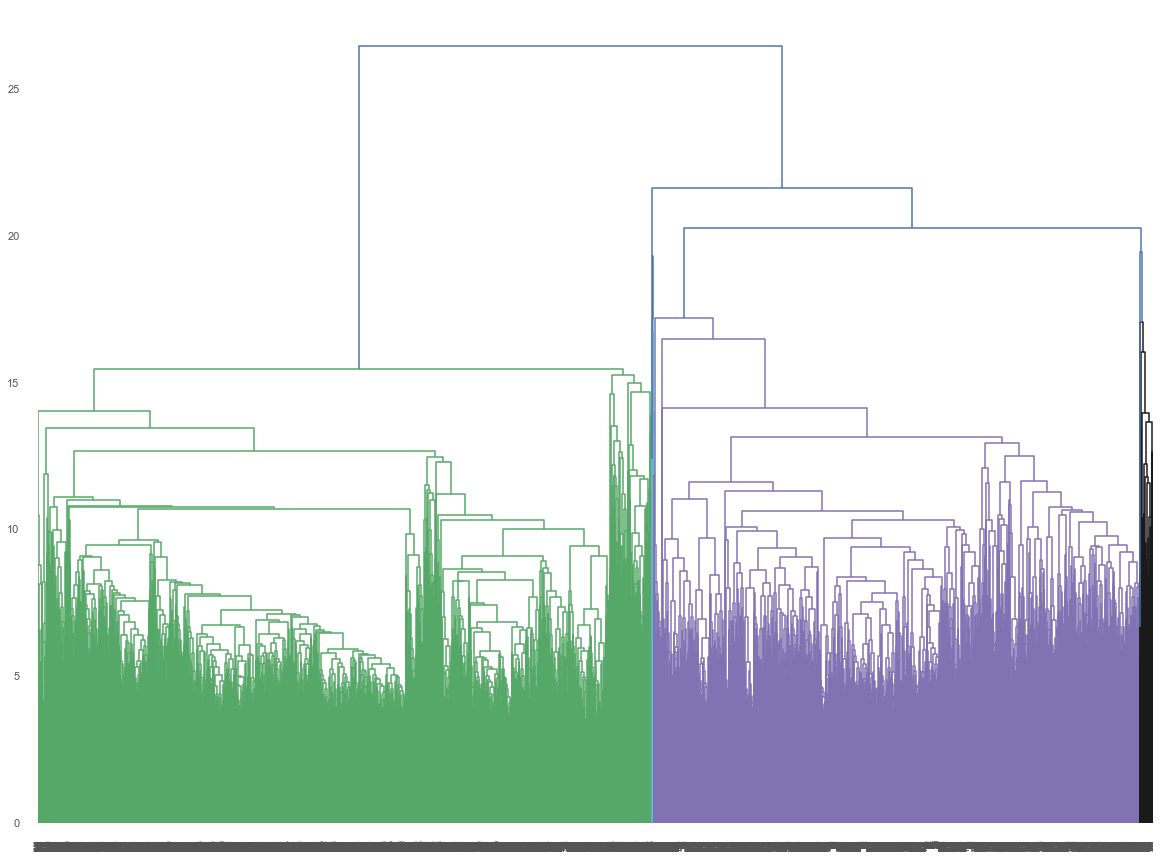

In [86]:
Z = hierarchy.linkage(data,'average')
plt.figure(figsize=(20,15))
dn = hierarchy.dendrogram(Z)

In [87]:
sns.set(color_codes=True)
g = sns.clustermap(data, cmap="mako",method='average')

c:\users\afabi\pycharmprojects\datamining\venv\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


## Agglomerative Clustering 

In [88]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

n_clusters = 2
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="average")
model.fit(data)
clustlabels=model.fit_predict(data)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the two clusters")
print(np.asarray((unique_elements, counts_elements)))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

Size of the two clusters
[[   0    1]
 [3299 4053]]


In [106]:
from sklearn.metrics import calinski_harabasz_score

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,linkage="average")
    clusterer.fit(data)
    cluster_labels=clusterer.fit_predict(data)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    calinski= calinski_harabasz_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "El Index de calinski es :", calinski)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

For n_clusters = 2 El Index de calinski es : 13652.536299903044


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

For n_clusters = 3 El Index de calinski es : 6890.726669835644


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

For n_clusters = 4 El Index de calinski es : 4890.46731164959


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)

For n_clusters = 5 El Index de calinski es : 3673.292818477168


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6)

For n_clusters = 6 El Index de calinski es : 2941.3782414434836


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

<Figure size 4680x3240 with 0 Axes>

(-10.8, 226.8, -7.05942191291941, 7.294524097331465)

(-10.8, 226.8, -7.05942191291941, 7.294524097331465)

Text(0.5, 0.98, 'AgglomerativeClustering(affinity=Ward)')

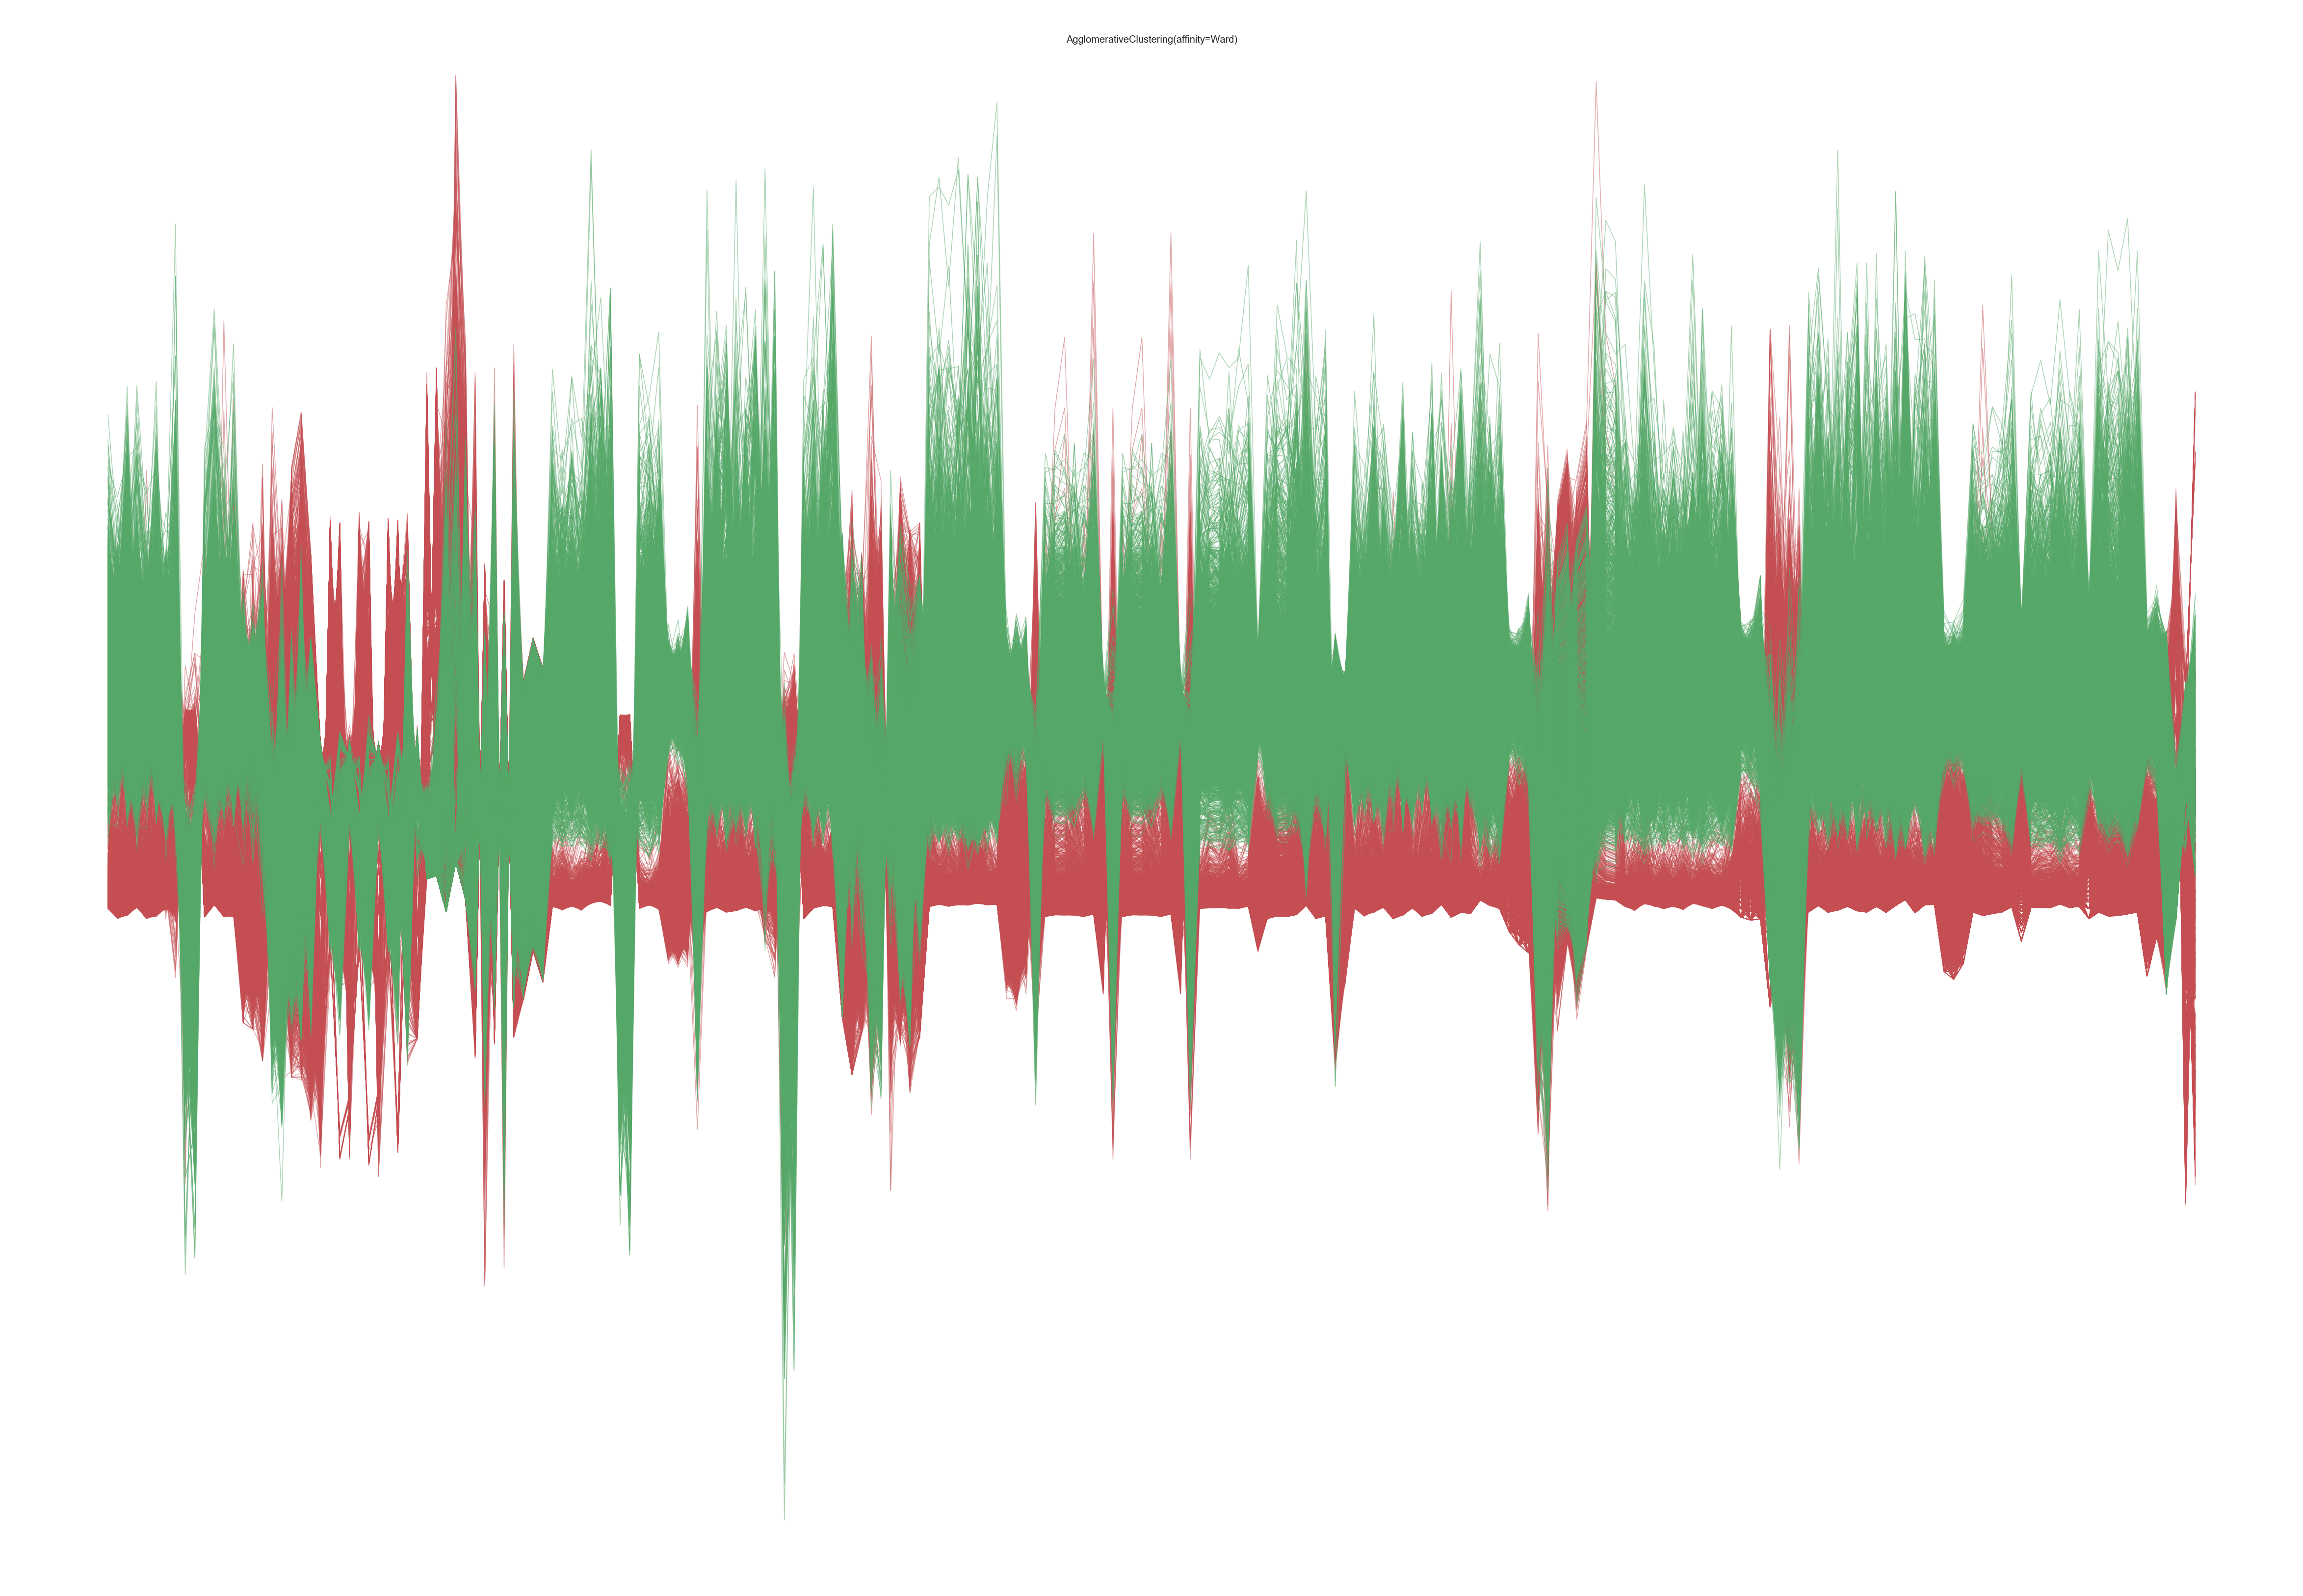

Tamano de los seis clusters formados
[[   0    1]
 [4066 3286]]


In [91]:
import matplotlib.style as style 
style.use('ggplot')

model = AgglomerativeClustering(n_clusters=2,linkage="ward")
model.fit(data)
clustlabels=model.fit_predict(data)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
plt.figure(figsize=(65,45))
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
    _  = plt.plot(data[model.labels_ == l].T, c=c, alpha=.5)
plt.axis('tight')
plt.axis('off')
plt.suptitle("AgglomerativeClustering(affinity=%s)" % "Ward", size=20)
plt.show();
print("Tamano de los seis clusters formados")
print(np.asarray((unique_elements, counts_elements)))

In [97]:
pd.crosstab(clustlabels,df_en_target)

Activity     0     1     2     3    4     5
row_0                                      
0         1407  1285  1374     0    0     0
1            0     1     0  1226  986  1073

## Gaussian Mixture Clustering

In [93]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(data)
        bic.append(gmm.bic(data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm

bars = []
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(1, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)




GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<Figure size 576x432 with 0 Axes>

([<matplotlib.axis.XTick at 0x23eae965978>,
 <a list of 6 Text xticklabel objects>)

(-5570610.174194751, 4531367.449523397)

Text(0.5, 1.0, 'BIC score per model')

Text(3.25, -5170531.85246334, '*')

Text(0.5, 0, 'Number of components')

In [94]:
gmm = mixture.GaussianMixture( n_components=2, covariance_type='full')
gm=gmm.fit(data)
pred=gmm.predict(data)

pd.crosstab(pred,df_en_target)


Activity     0     1     2     3    4     5
row_0                                      
0         1394  1262  1307     0    0     0
1           13    24    67  1226  986  1073

# K-means

In [103]:
cluster_errors = []

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    calinski= calinski_harabasz_score(data, cluster_labels)
    cluster_errors.append(clusterer.inertia_ )
    print("For n_clusters =", n_clusters,
          "El Index de calinski es :", calinski)

For n_clusters = 2 El Index de calinski es : 13662.788874082804
For n_clusters = 3 El Index de calinski es : 8311.94439584585
For n_clusters = 4 El Index de calinski es : 6687.072175082889
For n_clusters = 5 El Index de calinski es : 5489.334424722598
For n_clusters = 6 El Index de calinski es : 4658.511447849322


In [104]:
clusters_df = pd.DataFrame( { "num_clusters":range_n_clusters, "cluster_errors": cluster_errors } )

clusters_df[0:10]



num_clusters  cluster_errors
0             2   558044.554213
1             3   489072.348263
2             4   427698.530573
3             5   399984.683784
4             6   382514.449766

In [99]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
clustlabels=kmeans.fit_predict(data)

In [100]:
pd.crosstab(clustlabels,df_en_target)

Activity     0     1     2     3    4     5
row_0                                      
0           11     1     0  1226  986  1073
1         1396  1285  1374     0    0     0

# Restaurant & Consumer Data Set

In [127]:
accepts = pd.read_csv('chefmozaccepts.csv')
cuisine = pd.read_csv('chefmozcuisine.csv')
hours = pd.read_csv('chefmozhours4.csv')
parking = pd.read_csv('chefmozparking.csv')
geo = pd.read_csv('geoplaces2.csv') 
usercuisine = pd.read_csv('usercuisine.csv')
payment = pd.read_csv('userpayment.csv')
profile = pd.read_csv('userprofile.csv')
rating = pd.read_csv('rating_final.csv')

## Data Exploratory Analysis

In [128]:
accepts.head()

placeID             Rpayment
0   135110                 cash
1   135110                 VISA
2   135110  MasterCard-Eurocard
3   135110     American_Express
4   135110     bank_debit_cards

In [129]:
print("There are {} unique placeID's.".format(len(accepts.placeID.unique())))
print("There are {} unique Rpayment categories:".format(len(accepts.Rpayment.unique())))
print(accepts.Rpayment.unique())

There are 615 unique placeID's.
There are 12 unique Rpayment categories:
['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


In [130]:
cuisine.head()

placeID        Rcuisine
0   135110         Spanish
1   135109         Italian
2   135107  Latin_American
3   135106         Mexican
4   135105       Fast_Food

In [131]:
print("There are {} unique placeID's.".format(len(cuisine.placeID.unique())))
print("There are {} unique Rcuisine categories:".format(len(cuisine.Rcuisine.unique())))
print(cuisine.Rcuisine.unique())

There are 769 unique placeID's.
There are 59 unique Rcuisine categories:
['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


In [132]:
hours.head()

placeID         hours                  days
0   135111  00:00-23:30;  Mon;Tue;Wed;Thu;Fri;
1   135111  00:00-23:30;                  Sat;
2   135111  00:00-23:30;                  Sun;
3   135110  08:00-19:00;  Mon;Tue;Wed;Thu;Fri;
4   135110  00:00-00:00;                  Sat;

In [133]:
print("There are {} unique placeID's.".format(len(hours.placeID.unique())))

There are 694 unique placeID's.


In [134]:
res_all = np.concatenate((accepts.placeID.unique(), cuisine.placeID.unique(), 
                          hours.placeID.unique(), parking.placeID.unique(), geo.placeID.unique()))
res_all = np.sort( np.unique(res_all) ) # All the placeID's

print("There are {} restaurants.".format(len(res_all)))

There are 938 restaurants.


In [135]:
user_all = np.concatenate((usercuisine.userID.unique(), payment.userID.unique(), 
                           profile.userID.unique()))
user_all = np.sort( np.unique(user_all) ) # All the userID's

print("There are {} users.".format(len(user_all)))

There are 138 users.


In [136]:
overall_rating = pd.DataFrame( np.zeros((len(res_all),len(user_all)))-1.0, 
                              columns=user_all, index=res_all )
food_rating = overall_rating.copy()
service_rating = overall_rating.copy() 

for r, u, o, f, s in zip(rating.placeID, rating.userID, rating.rating, rating.food_rating, 
                         rating.service_rating):
    overall_rating.loc[r,u] = o
    food_rating.loc[r,u] = f
    service_rating.loc[r,u] = s

In [137]:
review = pd.DataFrame( np.zeros(overall_rating.shape), columns=user_all, index=res_all)
review[overall_rating >= 0] = 1

In [138]:
review = pd.DataFrame( np.zeros(overall_rating.shape), columns=user_all, index=res_all)
review[overall_rating >= 0] = 1

In [139]:
# use dummy variables for different cuisine categories of the restaurants
res_cuisine = pd.get_dummies(cuisine,columns=['Rcuisine'])

# remove duplicate restaurant ID's. 
# A restaurant with multiple cuisine categories would have multiple columns equal 1
res_cuisine = res_cuisine.groupby('placeID',as_index=False).sum()

res_cuisine.head()

placeID  Rcuisine_Afghan  Rcuisine_African  Rcuisine_American  \
0   132001                0                 0                  0   
1   132002                0                 0                  0   
2   132003                0                 0                  0   
3   132004                0                 0                  0   
4   132005                0                 0                  0   

   Rcuisine_Armenian  Rcuisine_Asian  Rcuisine_Bagels  Rcuisine_Bakery  \
0                  0               0                0                0   
1                  0               0                0                0   
2                  0               0                0                0   
3                  0               0                0                0   
4                  0               0                0                0   

   Rcuisine_Bar  Rcuisine_Bar_Pub_Brewery  Rcuisine_Barbecue  \
0             0                         0                  0   
1             0                         0                  0   
2             0                         0                  0   
3             0                         0                  0   
4             0                         0                  0   

   Rcuisine_Brazilian  Rcuisine_Breakfast-Brunch  Rcuisine_Burgers  \
0                   0                          0                 0   
1                   0                          0                 0   
2                   0                          0                 0   
3                   0                          0                 0   
4                   0                          0                 0   

   Rcuisine_Cafe-Coffee_Shop  Rcuisine_Cafeteria  Rcuisine_California  \
0                          0                   0                    0   
1                          0                   0                    0   
2                          0                   0                    0   
3                          0                   0                    0   
4                          0                   0                    0   

   Rcuisine_Caribbean  Rcuisine_Chinese  Rcuisine_Contemporary  \
0                   0                 0                      0   
1                   0                 0                      0   
2                   0                 0                      0   
3                   0                 0                      0   
4                   0                 0                      0   

   Rcuisine_Continental-European  Rcuisine_Deli-Sandwiches  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   Rcuisine_Dessert-Ice_Cream  Rcuisine_Diner  Rcuisine_Dutch-Belgian  \
0                           0               0                       1   
1                           0               0                       0   
2                           0               0                       0   
3                           0               0                       0   
4                           0               0                       0   

   Rcuisine_Eastern_European  Rcuisine_Ethiopian  Rcuisine_Family  \
0                          0                   0                0   
1                          0                   0                0   
2                          0                   0                0   
3                          0                   0                0   
4                          0                   0                0   

   Rcuisine_Fast_Food  Rcuisine_Fine_Dining  Rcuisine_French  Rcuisine_Game  \
0                   0                     0                0              0   
1                   0                     0                0              0   
2                   0                     0

In [140]:
res_parking = parking.copy()
res_parking.parking_lot = res_parking.parking_lot.map({'fee':1, 'none':0, 'public':1, 'yes':2,
                                        'street':1, 'valet parking':1, 'validated parking':1})

# remove duplicate restaurant ID's. 
# A restaurant with multiple parking options may have a value > 2
res_parking = res_parking.groupby('placeID',as_index=False).sum()

In [141]:
res_info = geo[['latitude','longitude','placeID','name','address','city','state']]

# These features should be relevant for rating prediction since they are about services 
# and price. Especially, 'alcohol','smoking_area', and 'price' relate to 'drink_level', 
# 'smoker', and 'budget' in the user profiles 
res_service_price = geo[['placeID','alcohol','smoking_area','other_services','price']]
print(res_service_price.alcohol.value_counts())
print('\n')
print(res_service_price.smoking_area.value_counts())
print('\n')
print(res_service_price.other_services.value_counts())
print('\n')
print(res_service_price.price.value_counts())

No_Alcohol_Served    87
Wine-Beer            34
Full_Bar              9
Name: alcohol, dtype: int64


none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64


none        119
variety       7
Internet      4
Name: other_services, dtype: int64


medium    60
low       45
high      25
Name: price, dtype: int64


In [142]:
# 1 if alcohol is available, 0 otherwise
res_service_price.alcohol = res_service_price.alcohol.map(lambda x: 0 if x == 'No_Alcohol_Served' else 1)
# 1 if there is smoking area, 0 otherwise
res_service_price.smoking_area = res_service_price.smoking_area.map(lambda x: 0 if (x == 'none') | (x == 'not permitted') else 1)
# 1 if other services are available, 0 otherwise
res_service_price.other_services = res_service_price.other_services.map(lambda x: 0 if x == 'none'  else 1)
# map price levels to numbers
res_service_price.price = res_service_price.price.map({'low': 1, 'medium': 2, 'high': 3})

c:\users\afabi\pycharmprojects\datamining\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [143]:
# Whether these features are relevant is not so clear
res_environment = geo[['placeID','dress_code','accessibility','Rambience','area']]
print(res_environment.dress_code.value_counts())
print('\n')
print(res_environment.accessibility.value_counts())
print('\n')
print(res_environment.Rambience.value_counts())
print('\n')
print(res_environment.area.value_counts())

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64


no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64


familiar    121
quiet         9
Name: Rambience, dtype: int64


closed    115
open       15
Name: area, dtype: int64


In [144]:
# 1 if formal dress is required, 0 otherwise
res_environment.dress_code = res_environment.dress_code.map({'informal':0, 'casual':0, 'formal': 1})
# map accessibility levels to numbers
res_environment.accessibility = res_environment.accessibility.map({'no_accessibility':0, 'partially':1, 'completely': 2})
res_environment.Rambience = res_environment.Rambience.map({'familiar':0, 'quiet': 1})
res_environment.area = res_environment.area.map({'open':0, 'closed':1})

In [126]:
df_res = pd.DataFrame({'placeID': res_all})
df_res = pd.merge(left=df_res, right=res_cuisine, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_parking, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_service_price, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_environment, how="left", on="placeID")

print(df_res.shape)
df_res.head()

(938, 69)


placeID  Rcuisine_Afghan  Rcuisine_African  Rcuisine_American  \
0   132001              0.0               0.0                0.0   
1   132002              0.0               0.0                0.0   
2   132003              0.0               0.0                0.0   
3   132004              0.0               0.0                0.0   
4   132005              0.0               0.0                0.0   

   Rcuisine_Armenian  Rcuisine_Asian  Rcuisine_Bagels  Rcuisine_Bakery  \
0                0.0             0.0              0.0              0.0   
1                0.0             0.0              0.0              0.0   
2                0.0             0.0              0.0              0.0   
3                0.0             0.0              0.0              0.0   
4                0.0             0.0              0.0              0.0   

   Rcuisine_Bar  Rcuisine_Bar_Pub_Brewery  Rcuisine_Barbecue  \
0           0.0                       0.0                0.0   
1           0.0                       0.0                0.0   
2           0.0                       0.0                0.0   
3           0.0                       0.0                0.0   
4           0.0                       0.0                0.0   

   Rcuisine_Brazilian  Rcuisine_Breakfast-Brunch  Rcuisine_Burgers  \
0                 0.0                        0.0               0.0   
1                 0.0                        0.0               0.0   
2                 0.0                        0.0               0.0   
3                 0.0                        0.0               0.0   
4                 0.0                        0.0               0.0   

   Rcuisine_Cafe-Coffee_Shop  Rcuisine_Cafeteria  Rcuisine_California  \
0                        0.0                 0.0                  0.0   
1                        0.0                 0.0                  0.0   
2                        0.0                 0.0                  0.0   
3                        0.0                 0.0                  0.0   
4                        0.0                 0.0                  0.0   

   Rcuisine_Caribbean  Rcuisine_Chinese  Rcuisine_Contemporary  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    0.0   
3                 0.0               0.0                    0.0   
4                 0.0               0.0                    0.0   

   Rcuisine_Continental-European  Rcuisine_Deli-Sandwiches  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   

   Rcuisine_Dessert-Ice_Cream  Rcuisine_Diner  Rcuisine_Dutch-Belgian  \
0                         0.0             0.0                     1.0   
1                         0.0             0.0                     0.0   
2                         0.0             0.0                     0.0   
3                         0.0             0.0                     0.0   
4                         0.0             0.0                     0.0   

   Rcuisine_Eastern_European  Rcuisine_Ethiopian  Rcuisine_Family  \
0                        0.0                 0.0              0.0   
1                        0.0                 0.0              0.0   
2                        0.0                 0.0              0.0   
3                        0.0                 0.0              0.0   
4                        0.0                 0.0              0.0   

   Rcuisine_Fast_Food  Rcuisine_Fine_Dining  Rcuisine_French  Rcuisine_Game  \
0                 0.0                   0.0              0.0            0.0   
1                 0.0                   0.0              0.0            0.0   
2                 0.0                   0.0

In [145]:
# The placeID's for the 130 restaurants with ratings
res_rated = res_all[np.sum(review,axis=1) > 0] 

# tells us whether a restaurant-user pair has a rating. 0 means No and 1 means Yes.
R = review.loc[res_rated].values  # shape = (130,138)

Y_service = service_rating.loc[res_rated].values
Y_overall = overall_rating.loc[res_rated].values
Y_food  = food_rating.loc[res_rated].values

In [146]:
# select the indices of "df_res" where a restaurant has ratings
index = np.array([x in res_rated for x in df_res['placeID'].values])
index = np.where(index == True)[0]
# restaurant features for the 130 restaurants with ratings
X = df_res.loc[index, :].reset_index(drop=True)
print(X.isnull().sum()) # all the NANs are from cuisine 

placeID                           0
Rcuisine_Afghan                  35
Rcuisine_African                 35
Rcuisine_American                35
Rcuisine_Armenian                35
Rcuisine_Asian                   35
Rcuisine_Bagels                  35
Rcuisine_Bakery                  35
Rcuisine_Bar                     35
Rcuisine_Bar_Pub_Brewery         35
Rcuisine_Barbecue                35
Rcuisine_Brazilian               35
Rcuisine_Breakfast-Brunch        35
Rcuisine_Burgers                 35
Rcuisine_Cafe-Coffee_Shop        35
Rcuisine_Cafeteria               35
Rcuisine_California              35
Rcuisine_Caribbean               35
Rcuisine_Chinese                 35
Rcuisine_Contemporary            35
Rcuisine_Continental-European    35
Rcuisine_Deli-Sandwiches         35
Rcuisine_Dessert-Ice_Cream       35
Rcuisine_Diner                   35
Rcuisine_Dutch-Belgian           35
Rcuisine_Eastern_European        35
Rcuisine_Ethiopian               35
Rcuisine_Family             

In [147]:
X = X.fillna(0) # fill all NANs with 0
# drop a feature if the entire column are 0
features_to_drop = X.columns.values[np.sum(X,axis=0) == 0] 
X = X.drop(features_to_drop, axis=1)
X = X.drop(['placeID'], axis=1)
X.head()

Rcuisine_American  Rcuisine_Armenian  Rcuisine_Bakery  Rcuisine_Bar  \
0                0.0                0.0              0.0           0.0   
1                0.0                0.0              0.0           0.0   
2                0.0                0.0              0.0           0.0   
3                0.0                0.0              0.0           0.0   
4                1.0                0.0              0.0           0.0   

   Rcuisine_Bar_Pub_Brewery  Rcuisine_Breakfast-Brunch  Rcuisine_Burgers  \
0                       0.0                        0.0               0.0   
1                       0.0                        0.0               0.0   
2                       0.0                        0.0               0.0   
3                       0.0                        0.0               0.0   
4                       0.0                        0.0               0.0   

   Rcuisine_Cafe-Coffee_Shop  Rcuisine_Cafeteria  Rcuisine_Chinese  \
0                        0.0                 0.0               0.0   
1                        0.0                 0.0               0.0   
2                        0.0                 0.0               0.0   
3                        0.0                 1.0               0.0   
4                        0.0                 0.0               0.0   

   Rcuisine_Contemporary  Rcuisine_Family  Rcuisine_Fast_Food  Rcuisine_Game  \
0                    0.0              0.0                 0.0            0.0   
1                    0.0              0.0                 0.0            0.0   
2                    0.0              0.0                 0.0            0.0   
3                    0.0              0.0                 0.0            0.0   
4                    0.0              0.0                 0.0            0.0   

   Rcuisine_International  Rcuisine_Italian  Rcuisine_Japanese  \
0                     0.0               0.0                0.0   
1                     0.0               0.0                0.0   
2                     0.0               0.0                0.0   
3                     0.0               0.0                0.0   
4                     0.0               0.0                0.0   

   Rcuisine_Mediterranean  Rcuisine_Mexican  Rcuisine_Pizzeria  \
0                     0.0               0.0                0.0   
1                     0.0               0.0                0.0   
2                     0.0               0.0                0.0   
3                     0.0               0.0                0.0   
4                     0.0               0.0                0.0   

   Rcuisine_Regional  Rcuisine_Seafood  Rcuisine_Vietnamese  parking_lot  \
0                1.0               0.0                  0.0          1.0   
1                0.0               0.0                  0.0          0.0   
2                0.0               0.0                  0.0          0.0   
3                0.0               0.0                  0.0          2.0   
4                0.0               0.0                  0.0          0.0   

   alcohol  smoking_area  other_services  price  dress_code  accessibility  \
0      0.0           1.0             0.0    1.0         0.0            0.0   
1      0.0           0.0             0.0    1.0         0.0            2.0   
2      0.0           0.0             0.0    1.0         0.0            2.0   
3      0.0           0.0             0.0    1.0         0.0            2.0   
4      0.0           0.0             0.0    1.0         0.0            1.0   

   Rambience  area  
0        0.0   0.0  
1        0.0   1.0  
2        0.0   1.0  
3        0.0   1.0  
4        0.0   1.0

In [148]:
X = X[['parking_lot','alcohol','smoking_area','other_services','price','dress_code','accessibility']]
X['x0'] = 1 # add a bias term for linear regressions
X.head()

parking_lot  alcohol  smoking_area  other_services  price  dress_code  \
0          1.0      0.0           1.0             0.0    1.0         0.0   
1          0.0      0.0           0.0             0.0    1.0         0.0   
2          0.0      0.0           0.0             0.0    1.0         0.0   
3          2.0      0.0           0.0             0.0    1.0         0.0   
4          0.0      0.0           0.0             0.0    1.0         0.0   

   accessibility  x0  
0            0.0   1  
1            2.0   1  
2            2.0   1  
3            2.0   1  
4            1.0   1

In [153]:
num_rating = np.round(np.sum(R,axis=0)) # number of ratings from each user (minimum = 3)

# 25% of the existing ratings will be used as the validation set
# So during the training, they will be flagged 
g = lambda x: int(round(x*0.25)) 
flag = np.array( [g(x) for x in num_rating] )

random.seed(0)
cond = True

while cond:

    R_train = R.copy()

    # loop over each user
    for i in range(R_train.shape[1]):
        # the restaurants that are rated
        index = list( np.where(R_train[:,i] == 1)[0] )  
        # randomly select about 25% of them to be flagged
        index_flag = random.sample(index,flag[i])
        R_train[index_flag,i] = 0  
    
    # make sure in the traning set, each restaurant and each user receives/gives at least 
    # 2 ratings
    if (np.sum(R_train,axis=0).min() > 1) & (np.sum(R_train,axis=1).min() > 1): 
        cond = False
        
R_valid = R - R_train 
# Now "R_train" contains 876 ones, and "R_valid" contains 285 ones ("R" contains 1161 ones)
# The shape of "R", "R_train" and "R_valid" are all (130,138)  
print(R_train.sum())
print(R_valid.sum())

876.0
285.0


In [154]:
# FCP
def FCP(Y,Y_pred,R):
    
    # list of true ratings from each user (we only select users with at least two ratings)
    Y_fcp = []  
    Y_pred_fcp = [] # list of predicted ratings from each user 
    n_user = R.shape[1]
    
    for i in range(n_user):
        
        cond = (R.sum(axis=0) >= 2)[i] # there should be at least two ratings from a user
        index = np.where( R[:,i] == 1)[0] # the indices (restaurants) with ratings
    
        if cond:
            
            Y_fcp.append( (Y*R)[:,i][index] )
            Y_pred_fcp.append( (Y_pred*R)[:,i][index] )

        
    n_fcp = len(Y_fcp) # number of users with at least two ratings
    TP = 0. # Total number of pairs
    DP = 0. # number of discordant pairs
    CP = 0. # number of concordant pairs (excluding ties)
    
    for i in range(n_fcp):
        
        num_Y = len(Y_fcp[i])   # number of ratings from a user
        TP += num_Y*(num_Y-1)/2 # number of rating pairs = n*(n+1)/2 

        greater = np.array([])
        greater_pred = np.array([])

        # this loop is to go over all the rating pairs
        for j in range(num_Y-1):
            
            not_equal = Y_fcp[i][j] != Y_fcp[i][j+1:]
            greater = Y_fcp[i][j] > Y_fcp[i][j+1:]
            greater_pred = Y_pred_fcp[i][j] > Y_pred_fcp[i][j+1:]

            # filter the ones that are not ties
            greater = greater[not_equal]
            greater_pred = greater_pred[not_equal]

            DP += (greater != greater_pred).sum()
            CP += (greater == greater_pred).sum()
            
    print("Total number of rating pairs: {}".format(int(TP)))
    print("Total number of discordant pairs: {}".format(int(DP)))
    print("Total number of concordant pairs: {}".format(int(CP)))
    print("Total number of ties: {}".format(int(TP-DP-CP)))
    print("FCP: {}".format(CP/(CP+DP)))

## Analysis/Modeling

### Benchmark Model

In [155]:
def GetMean(Y,R):

    Y = Y*R
    mean =  (np.sum(Y, axis=1)/np.sum((R == 1.0), axis=1)).reshape(Y.shape[0],1) * np.ones(Y.shape)
    return mean

In [156]:
Y = Y_overall 
Y_mean = GetMean(Y,R_train) # get the average ratings based on the training set
Y_pred = np.zeros(Y.shape) + Y_mean # prediction 

# RMSE
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.6930171831949701
RMSE of the validation set: 0.828933960093509


In [157]:
# FCP
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Total number of rating pairs: 2808
Total number of discordant pairs: 395
Total number of concordant pairs: 859
Total number of ties: 1554
FCP: 0.6850079744816587


Validation Set:
Total number of rating pairs: 201
Total number of discordant pairs: 32
Total number of concordant pairs: 39
Total number of ties: 130
FCP: 0.5492957746478874


In [158]:
def MakeBoxplot(Y_pred, Y_true, R, title):
    
    data1 = Y_pred[R == 1][Y_true[R == 1] == 0]
    data2 = Y_pred[R == 1][Y_true[R == 1] == 1]
    data3 = Y_pred[R == 1][Y_true[R == 1] == 2]
    data = [data1,data2,data3]

    fig = plt.figure()
    plt.boxplot(data)
    plt.xticks([1, 2, 3],[0,1,2])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()

In [159]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')

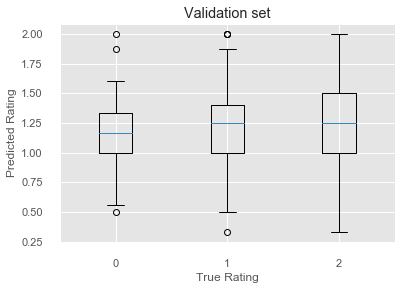

In [160]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')

### Content-based Model

In [161]:
def CostFunction(params, X, Y, R, lambd): # lambd is the L2 regularization coefficient
    
    num_user = R.shape[1]
    num_feature = X.shape[1]

    # reshape the parameters to a 2D matrix so we can perform matrix factorization
    Theta = params.reshape(num_user, num_feature)
    J = 0.5 * np.sum( (np.dot(X, Theta.T) * R - Y)**2 )

    # regularization
    J = J + lambd/2. * np.sum(Theta[:,:-1]**2) 

    return J


def Gradient(params, X, Y, R, lambd):
    
    num_user = R.shape[1]
    num_feature = X.shape[1]

    Theta = params.reshape(num_user, num_feature)
    Theta_grad = np.dot((np.dot(Theta, X.T) * R.T - Y.T), X)

    # regularization
    Theta_grad[:,:-1] = Theta_grad[:,:-1] + lambd*Theta[:,:-1]

    return Theta_grad.reshape(-1)

In [162]:
def MeanNorm(Y,R):
    
    Y_norm = Y*R
    mean =  (np.sum(Y_norm, axis=1)/np.sum((R == 1.0), axis=1)).reshape(Y.shape[0],1) * np.ones(Y.shape)
    Y_norm = (Y_norm - mean)*R

    return Y_norm, mean

In [163]:
Y_norm, Y_mean = MeanNorm(Y,R_train)

n_user = R.shape[1]
n_feature = X.shape[1]
lambd = 64. # L2 regularization; I ran the optimization multiple times with different values 
            # (1, 2, 4, 8...) and 64 results in the best validation FCP
    
Theta = np.random.normal(0,1,(n_user, n_feature)).reshape(-1) # initialize the weights

result = minimize(CostFunction, Theta, jac=Gradient, args=(X, Y_norm, R_train, lambd),
                  options={'disp': True, 'maxiter': 500})

Optimization terminated successfully.
         Current function value: 109.024339
         Iterations: 206
         Function evaluations: 271
         Gradient evaluations: 271


In [164]:
Theta_opt = result.x.reshape(n_user, n_feature) # reshape the optimial parameters to a 2D matrix 
Y_pred = np.dot(X, Theta_opt.T) + Y_mean
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.49150999407522505
RMSE of the validation set: 0.6992958891711194


In [165]:
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Total number of rating pairs: 2808
Total number of discordant pairs: 356
Total number of concordant pairs: 898
Total number of ties: 1554
FCP: 0.7161084529505582


Validation Set:
Total number of rating pairs: 201
Total number of discordant pairs: 31
Total number of concordant pairs: 40
Total number of ties: 130
FCP: 0.5633802816901409


In [166]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')

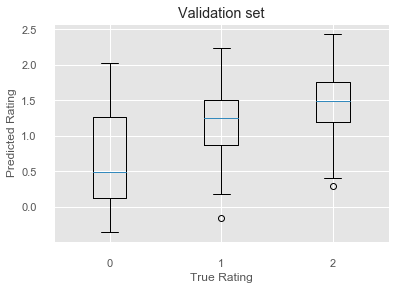

In [167]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')

### Second Content-Based Model

In [168]:
user_info = profile[['smoker','drink_level','transport','budget']]

print(user_info.smoker.value_counts())
print('\n')
print(user_info.drink_level.value_counts())
print('\n')
print(user_info.transport.value_counts())
print('\n')
print(user_info.budget.value_counts())

false    109
true      26
?          3
Name: smoker, dtype: int64


abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64


public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64


medium    91
low       35
?          7
high       5
Name: budget, dtype: int64


In [169]:
# 1 for smokers, 0 otherwise; assume '?' to be non-smokers
user_info.smoker = user_info.smoker.map({'false': 0, 'true': 1, '?': 0})
# map drink levels to numbers
user_info.drink_level = user_info.drink_level.map({'abstemious': 1, 'casual drinker': 2, 'social drinker': 3})
# 1 for car owners, 0 otherwise; assume '?' to be not car owners
user_info.transport = user_info.transport.map({'public':0, 'car owner':1, 'on foot':0, '?':0})
# map budget levels to numbers; assume '?' to be medium
user_info.budget = user_info.budget.map({'medium':2, 'low':1, 'high':3, '?':2})

c:\users\afabi\pycharmprojects\datamining\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [170]:
Theta_modifier = pd.DataFrame(np.ones((n_user, n_feature)), columns=X.columns.values) 
Theta_modifier['parking_lot'] = user_info['transport'] # 0 or 1
Theta_modifier['alcohol'] = user_info['drink_level'] # 1, 2 or 3
Theta_modifier['smoking_area'] = user_info['smoker'] # 0 or 1
Theta_modifier['price'] = 1.0/user_info['budget'] # 1 (low), 1/2 (medium) or 1/3 (high)
Theta_modifier = Theta_modifier.values

In [171]:
def CostFunction2(params, X, Y, R, Theta_modifier, lambd):

    num_user = R.shape[1]
    num_feature = X.shape[1]

    # reshape the Theta_modifier to 1-D
    Theta_temp = Theta_modifier.reshape(-1)
    # elements with non-zero values in Theta_modifier are multiplied to the input weights
    Theta_temp[Theta_temp > 0] = Theta_temp[Theta_temp > 0] * params
    
    # reshape the parameters to a 2D matrix so we can perform matrix factorization.
    # Elements with zero values in Theta_modifier always remain 0 in this matrix (for those 
    # users who don't have a car and those who don't smoke)
    Theta = Theta_temp.reshape(num_user, num_feature)
    J = 0.5 * np.sum( (np.dot(X, Theta.T) * R - Y)**2 )

    # regularization
    J = J + lambd/2. * np.sum(Theta[:,:-1]**2) 

    return J


def Gradient2(params, X, Y, R, Theta_modifier, lambd):

    num_user = R.shape[1]
    num_feature = X.shape[1]

    Theta_temp = Theta_modifier.reshape(-1)
    Theta_temp[Theta_temp > 0] = Theta_temp[Theta_temp > 0] * params

    Theta = Theta_temp.reshape(num_user, num_feature)
    Theta_grad = np.dot((np.dot(Theta, X.T) * R.T - Y.T), X) 

    # regularization
    Theta_grad[:,:-1] = Theta_grad[:,:-1] + lambd*Theta[:,:-1]
    Theta_grad = Theta_grad * Theta_modifier

    Theta_grad = Theta_grad[Theta_modifier > 0]
    
    return Theta_grad

In [172]:
lambd = 64. # L2 regularization; I ran the optimization multiple times with different values 
            # (1, 2, 4, 8...) and 64 results in the best validation FCP
    
Theta = np.random.normal(0,1,(n_user, n_feature))[Theta_modifier > 0] # initialize the weights

result = minimize(CostFunction2, Theta, jac=Gradient2, args=(X, Y_norm, R_train, Theta_modifier, 
                  lambd), options={'disp': True, 'maxiter': 500})

Optimization terminated successfully.
         Current function value: 110.032844
         Iterations: 233
         Function evaluations: 275
         Gradient evaluations: 275


In [173]:
# elements with non-zero values in Theta_modifier are multiplied to the optimal weights
Theta_transformer = Theta_modifier.reshape(-1)
Theta_transformer[Theta_transformer > 0] = Theta_transformer[Theta_transformer > 0] * result.x
# reshape the parameters to a 2D matrix 
Theta_opt = Theta_transformer.reshape(n_user, n_feature)

Y_pred = np.dot(X, Theta_opt.T) + Y_mean
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.49590893867358304
RMSE of the validation set: 0.6986709072201515


In [174]:
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Total number of rating pairs: 2808
Total number of discordant pairs: 362
Total number of concordant pairs: 892
Total number of ties: 1554
FCP: 0.7113237639553429


Validation Set:
Total number of rating pairs: 201
Total number of discordant pairs: 31
Total number of concordant pairs: 40
Total number of ties: 130
FCP: 0.5633802816901409


In [175]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')

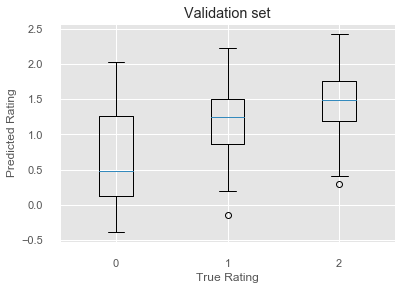

In [176]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')

In [177]:
R_test =  R*(-1) + 1.0 # 1 for those without existing ratings, 0 otherwise

# predicted ratings for the restaurants that each user hasn't visited
Y_final = Y_pred * R_test
Y_final = pd.DataFrame( Y_final, columns=user_all, index=res_rated )
Y_final.head()

U1001     U1002     U1003     U1004     U1005     U1006     U1007  \
132560  0.163740  0.604283  0.456770  0.681650  0.354380  0.582535  0.042386   
132561  0.545511  0.988817  0.811936  0.987383  0.686475  0.928679  0.406147   
132564  1.128844  1.572150  1.395270  1.570717  1.269808  1.512012  0.989481   
132572  0.801921  1.245227  1.068347  1.243794  0.942885  0.000000  0.000000   
132583  1.187958  1.629883  1.467686  1.667850  1.353761  1.588747  1.057600   

           U1008     U1009     U1010     U1011     U1012     U1013     U1014  \
132560  0.409461  0.709452  0.316296  0.212121  0.611818  0.393508  0.782626   
132561  0.754006  1.017195  0.669804  0.537879  0.918826  0.808892  1.115960   
132564  1.337339  1.600529  1.253137  0.000000  1.502160  1.392225  1.699293   
132572  1.010416  1.273605  0.885864  0.794289  1.175237  0.000000  1.372370   
132583  1.415067  1.696657  1.336471  1.208333  1.598655  1.434533  1.782626   

           U1015     U1016     U1017     U1018     U1019     U1020     U1021  \
132560 -0.107118  0.969850 -0.025063 -0.021632 -0.731839  0.504835  1.333333   
132561  0.192010  1.334332  0.348371  0.322386 -0.394672  0.836535  1.666667   
132564  0.775344  1.917665  0.931704  0.905719  0.188661  1.419869  2.250000   
132572  0.448421  1.590742  0.604781  0.578796 -0.138262  1.092945  1.923077   
132583  0.881211  1.985424  0.994987  0.981766  0.270077  1.504019  2.333333   

           U1022     U1023     U1024     U1025  ...     U1114     U1115  \
132560  0.509152 -0.540074  0.173909  0.543862  ... -0.543715  0.967406   
132561  0.845220 -0.192579  0.496493  0.794449  ... -0.212157  1.275242   
132564  1.428554  0.390755  1.079826  1.377782  ...  0.371176  1.858575   
132572  1.096160  0.059750  0.752903  1.050859  ...  0.044253  1.531652   
132583  1.511887  0.468027  1.168534  1.502489  ...  0.455398  1.952167   

           U1116     U1117     U1118     U1119     U1120     U1121     U1122  \
132560  0.337781  0.479131 -0.266904  0.684166  0.260389  0.126263  0.992983   
132561  0.671115  0.776122  0.026744  1.035228  0.593723  0.517172  1.324856   
132564  1.254448  1.359455  0.610077  1.618562  1.177056  1.100505  1.908189   
132572  0.927525  1.032532  0.283154  1.291639  0.850133  0.773582  1.581266   
132583  1.337781  1.460960  0.000000  0.000000  1.260389  1.155051  1.992253   

           U1123     U1124     U1125     U1126     U1127     U1128     U1129  \
132560  0.524829  0.196949  0.109800  0.536147  1.064890 -0.691922  0.241337   
132561  0.858162  0.530282  0.443133  0.858521  1.375177 -0.344290  0.000000   
132564  1.441495  1.113616  1.026467  1.441855  1.958510  0.239043  1.172855   
132572  1.114572  0.786693  0.699544  1.114932  1.631587 -0.087880  0.845932   
132583  1.524829  1.196949  1.109800  1.530668  2.053367  0.315227  1.248762   

           U1130     U1131     U1132     U1133     U1134     U1135     U1136  \
132560  0.275990  0.497432  0.652353  0.372582  0.296975 -0.880664  0.547155   
132561  0.000000  0.837818  1.005382  0.644856  0.563835 -0.535511  0.911746   
132564  1.148102  1.421151  1.588715  1.228189  1.147169  0.047822  1.495079   
132572  0.821179  1.134477  1.261792  0.943213  0.000000 -0.279101  1.176240   
132583  1.253713  1.490896  1.662201  1.331566  1.263739  0.125245  1.566483   

           U1137     U1138  
132560  0.787210  0.834625  
132561  1.171390  1.167959  
132564  1.754723  1.751292  
132572  1.427800  1.424369  
132583  1.812633  1.834625  

[5 rows x 138 columns]

### SVD

In [178]:
uID = []
pID = []
r = []

for i in range(R.shape[1]):
    for j in range(R.shape[0]):

        if R_train[j,i] == 1:
            
            pID.append(res_rated[j])
            uID.append(user_all[i])
            r.append(Y[j,i])


rating_train = pd.DataFrame({'userID':uID, 'placeID':pID, 'rating':r})
rating_train = rating_train[['userID','placeID','rating']]

uID = []
pID = []
r = []

for i in range(R.shape[1]):
    for j in range(R.shape[0]):

        if R_valid[j,i] == 1:
            
            pID.append(res_rated[j])
            uID.append(user_all[i])
            r.append(Y[j,i])


rating_valid = pd.DataFrame({'userID':uID, 'placeID':pID, 'rating':r})
rating_valid = rating_valid[['userID','placeID','rating']]

In [179]:
# A reader is needed to specify the rating_scale
reader = Reader(rating_scale=(0, 2))
data_train = Dataset.load_from_df(rating_train, reader)
trainset = data_train.build_full_trainset() # use the whole training set 

In [181]:
model = SVD() # better performance can be done by playing with the parameters
model.fit(trainset)

# my data form of ratings: shape=(130,138)
Y_pred = pd.DataFrame( np.zeros((len(res_rated),len(user_all)))-1.0, columns=user_all, index=res_rated )

size_valid = len(rating_valid)
size_train = len(rating_train)
r_pred_valid = np.zeros(size_valid)
r_pred_train = np.zeros(size_train)

# obtain predictions for the validation set
for i in range(size_valid):
    pred = model.predict(rating_valid.userID[i], rating_valid.placeID[i], verbose=False)
    r_pred_valid[i] = pred.est

# fill the predictions into my 'Y_pred' data frame
for r, u, o in zip(rating_valid.placeID, rating_valid.userID, r_pred_valid):
    Y_pred.loc[r,u] = o

# obtain predictions for the training set    
for i in range(size_train):
    pred = model.predict(rating_train.userID[i], rating_train.placeID[i], verbose=False)
    r_pred_train[i] = pred.est

# fill the predictions into my 'Y_pred' data frame    
for r, u, o in zip(rating_train.placeID, rating_train.userID, r_pred_train):
    Y_pred.loc[r,u] = o
    
Y_pred = Y_pred.values    

In [182]:
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.47628436041759564
RMSE of the validation set: 0.6945252372498021


In [183]:
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Total number of rating pairs: 2808
Total number of discordant pairs: 97
Total number of concordant pairs: 1157
Total number of ties: 1554
FCP: 0.9226475279106858


Validation Set:
Total number of rating pairs: 201
Total number of discordant pairs: 33
Total number of concordant pairs: 38
Total number of ties: 130
FCP: 0.5352112676056338


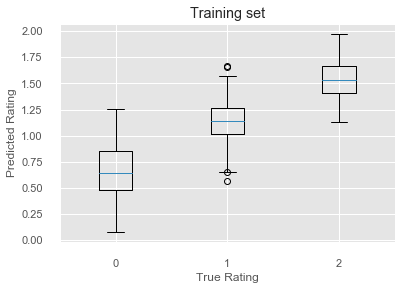

In [184]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')

In [185]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')